# Acne Detection using DenseNet

# Training and Validation

### Importing Dependencies

In [1]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

2024-08-03 22:16:28.149691: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:28.156224: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 22:16:28.178900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 22:16:28.210954: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 22:16:28.219428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 22:16:28.236378: I tensorflow/core/platform/cpu_feature_gu

### Load the pre-trained DenseNet121 model, excluding the top layers

In [2]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

### Freeze the base model layers

In [3]:
for layer in base_model.layers:
    layer.trainable = False

### Add custom classification layers

In [4]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

### Create the full model

In [5]:
model = Model(inputs=base_model.input, outputs=x)

### Compile the model

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Data augmentation and generators for training and validation

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [8]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    "dataset/training/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1646 images belonging to 2 classes.


In [10]:
val_generator = val_datagen.flow_from_directory(
    "dataset/validation/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 112 images belonging to 2 classes.


### Train the model

In [11]:
model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/home/agbor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 511s 9s/step - accuracy: 0.7481 - loss: 1.1506 - val_accuracy: 0.8839 - val_loss: 0.3917
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 484s 9s/step - accuracy: 0.9515 - loss: 0.1159 - val_accuracy: 0.9554 - val_loss: 0.1639
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 483s 9s/step - accuracy: 0.9803 - loss: 0.0556 - val_accuracy: 0.9464 - val_loss: 0.1954
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 530s 9s/step - accuracy: 0.9723 - loss: 0.0604 - val_accuracy: 0.9643 - val_loss: 0.1516
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 475s 9s/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.9464 - val_loss: 0.1954
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 477s 9s/step - accuracy: 0.9865 - loss: 0.0342 - val_accuracy: 0.8929 - val_loss: 0.5105
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 477s 9s/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9018 - val_loss: 0.4467
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 475s 9s/step - accuracy: 0.9947 - loss: 0.0202 - val_accuracy: 0.8839 - val_loss: 0.

### Model Evaluation

In [87]:
test_generator = val_datagen.flow_from_directory(
    "dataset/testing/",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 96 images belonging to 2 classes.


In [88]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


/home/agbor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8555 - loss: 0.3004
Test Accuracy: 0.91
Test Loss: 0.19


### Confusion Matrix

In [98]:
# Import functions for evaluating classification performance from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels from the test generator
# This will be an array of true class labels for the test dataset
true_labels = test_generator.classes

# Generate predictions for the test dataset using the trained model
# This method returns the predicted probabilities for each class
predictions = model.predict(test_generator)

# Convert the predicted probabilities to binary labels
# Using a threshold of 0.5 for binary classification
# Reshape the array to ensure it matches the shape of true_labels
predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

# Compute the confusion matrix to evaluate the performance of the model
# The confusion matrix provides insights into true positives, false positives, true negatives, and false negatives
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Generate a classification report that includes precision, recall, and F1-score
# This report provides a detailed evaluation of the model's performance for each class
print(classification_report(true_labels, predicted_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step
[[40  8]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        48
           1       0.85      0.98      0.91        48

    accuracy                           0.91        96
   macro avg       0.92      0.91      0.91        96
weighted avg       0.92      0.91      0.91        96



### Heatmap of Confusion Matrix

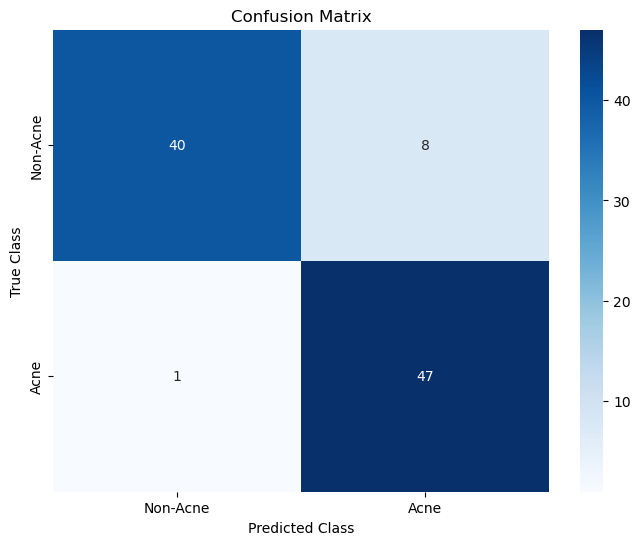

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume true_labels and predicted_labels are already defined as in the previous example

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names
class_names = ['Non-Acne', 'Acne']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


### ROC Curve and AUC (Area Under the Curve)

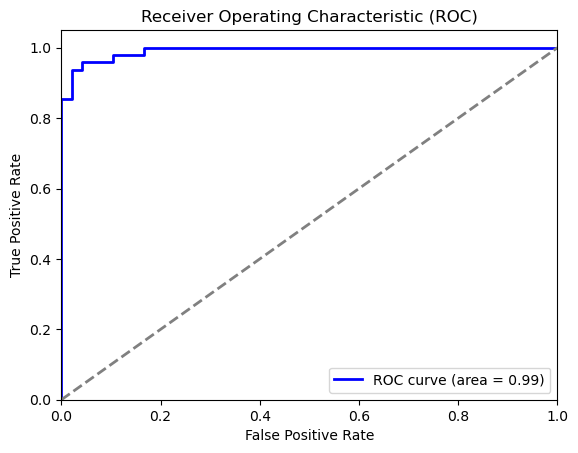

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Precision vs Recall vs F1-Score

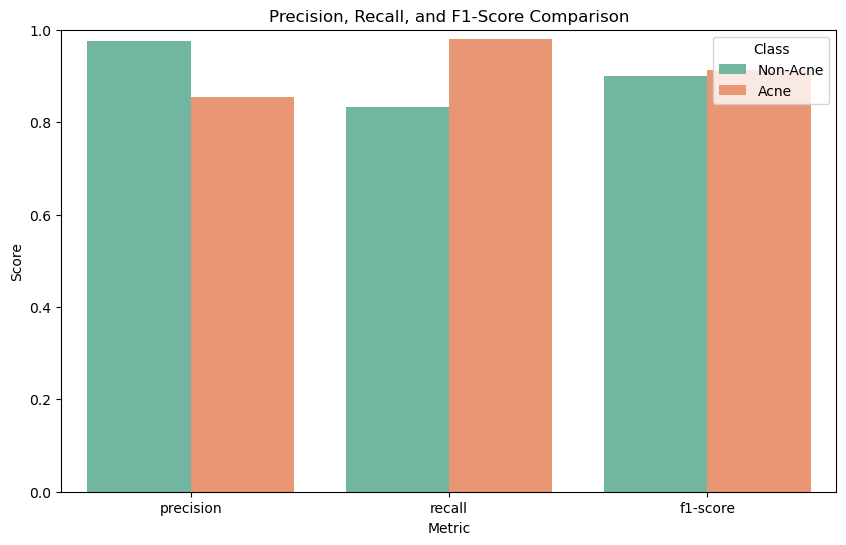

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming true_labels and predicted_labels are defined
# true_labels: Actual labels
# predicted_labels: Predicted labels by the model

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=['Non-Acne', 'Acne'], output_dict=True)

# Extract Precision, Recall, and F1-Score for each class
metrics = ['precision', 'recall', 'f1-score']
classes = ['Non-Acne', 'Acne']
values = {metric: [report[class_name][metric] for class_name in classes] for metric in metrics}

# Convert to a format suitable for seaborn
metrics_data = []
for metric, scores in values.items():
    for score, class_name in zip(scores, classes):
        metrics_data.append({'Metric': metric, 'Class': class_name, 'Score': score})

# Create a DataFrame
import pandas as pd
df_metrics = pd.DataFrame(metrics_data)

# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=df_metrics, palette='Set2')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.ylabel('Score')
plt.show()


### Matthews Correlation Coefficient (MCC)

These metrics provide a more comprehensive evaluation of your model's performance, helping to understand its strengths and weaknesses, especially in the context of medical diagnostics where accurate classification is critical.

In [93]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_labels, predicted_labels)
print(f'MCC: {mcc:.2f}')


MCC: 0.82


### Making predictions using a single image

In [94]:
# Import necessary libraries
import numpy as np  # For numerical operations
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Load and preprocess the image
img_path = "dataset/single_prediction/eczema.jpeg"  # Path to the image file
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it to 224x224 pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing (scaling pixel values)

# Make a prediction using the trained model
prediction = model.predict(img_array)  # Get the predicted probability from the model
prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

# Map prediction to class label
class_labels = ['Non-Acne', 'Acne']  # Define the class labels
predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

# Print the predicted class label
print(f'Predicted Label: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted Label: Acne


### Saving the Model

In [95]:
from tensorflow.keras.models import save_model

# Assuming `model` is your trained Keras model
model.save('DenseNetModel.h5')  # Save model to HDF5 file


### Testing all the acne files

In [96]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model

# Define the directory path
acne_path = "/home/agbor/Public/Deep Learning Projects/Tom Aniebet/Acne Detection/dataset/testing/acne"

# Get a list of all files and directories in the specified directory
all_acne_files = os.listdir(acne_path)

# Filter out only files
acne_files = [f for f in all_acne_files if os.path.isfile(os.path.join(acne_path, f))]

# Load the model from the file
acne = load_model('DenseNetModel.h5')

# Iterate over each file in the acne directory
for file_name in acne_files:
    # Load and preprocess the image
    img_path = os.path.join(acne_path, file_name)  # Construct the full path to the image
    img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
    img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing

    # Make a prediction using the trained model
    prediction = acne.predict(img_array)  # Get the predicted probability from the model
    prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label

    # Map prediction to class label
    class_labels = ['Acne', 'Non-Acne']  # Define the class labels
    predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

    # Print the predicted class label
    print(f'Predicted Label for {file_name}: {predicted_label}')  # Output the predicted label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Predicted Label for acne-286_jpeg.rf.1b6bcca440593ac6e33617083f34a4c5.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicted Label for acne-422_jpeg.rf.c90a75e149931778d9c643273737df59.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Label for acne-276_jpeg.rf.9d0990f99dee0e0ec17d89fd07384e0b.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Predicted Label for acne-140_jpg.rf.785b2c29676c422c6a1cdbe6708f86e8.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Label for acne-84_jpeg.rf.040421ad53965f5f41ddc6f6a8edef9f.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Label for acne-60_jpeg.rf.f2694c8e6226c725ff40b771560b5e06.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted Label for acne-25_jpeg.rf.61edfe1eaf01bce48403a1a22f693a86.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Label for acne-32_jpeg.rf.6cfebd1da197182fd10391fc051d7308.jpg: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted 

### Testing all the Non-acne files

In [97]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image  # For image preprocessing
from tensorflow.keras.applications.vgg16 import preprocess_input  # For VGG16-specific preprocessing
from tensorflow.keras.models import load_model  # For loading a saved model


# Define the directory path
non_acne_path = "/home/agbor/Public/Deep Learning Projects/Tom Aniebet/Acne Detection/dataset/testing/skin"

# Get a list of all files and directories in the specified directory
non_acne_files = os.listdir(non_acne_path)

# Filter out only files
non_acne_files = [f for f in non_acne_files if os.path.isfile(os.path.join(non_acne_path, f))]


# Load the model from the file
non_acne = load_model('DenseNetModel.h5')

# Iterate over each file in the acne directory
for file_name in non_acne_files:
    try:
    

        # Load and preprocess the image
        img_path = os.path.join(non_acne_path, file_name)  # Construct the full path to the image
        img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
        img_array = image.img_to_array(img)  # Convert the image to a numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, 224, 224, 3)
        img_array = preprocess_input(img_array)  # Apply VGG16-specific preprocessing

        # Make a prediction using the trained model
        prediction = non_acne.predict(img_array)  # Get the predicted probability from the model
        prediction_class = (prediction > 0.5).astype(int)  # Convert probability to binary class label
        # Map prediction to class label
        class_labels = ['Acne', 'Non-Acne']  # Define the class labels
        predicted_label = class_labels[prediction_class[0][0]]  # Get the predicted class label

        # Print the predicted class label
        print(f'Predicted Label for {file_name}: {predicted_label}')  # Output the predicted label
    except Exception as e:
            print(f"Error processing {file_name}: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Predicted Label for actinic-keratosis-5FU-5.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted Label for eczema-hand-188.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Predicted Label for basal-cell-carcinoma-lesion-109.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted Label for stasis-dermatitis-169.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Predicted Label for actinic-keratosis-5FU-25.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted Label for basal-cell-carcinoma-lesion-94.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted Label for actinic-cheilitis-sq-cell-lip-54.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted Label for eczema-hand-133.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted Label for eczema-hyperkeratotic-2.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted Label for eczema-hand-14.jpg: Non-Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171m